# Hypothesis Testing

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import yfinance as yf
import datetime as dt

from scipy.stats import t
from scipy.stats import chi2
from scipy.stats import f

from jupyterthemes import jtplot
jtplot.style(figsize=(15, 9))

## Draft Zone

### Two-tailed test

In [3]:
ibm_df = pd.read_csv('../data/IBM_2013-09-01_2013-11-11_1d.csv', index_col=0, parse_dates=True)

returns_sample = np.log(ibm_df['Close'].div(ibm_df['Close'].shift(1)))

ibm_df.shape

(49, 7)

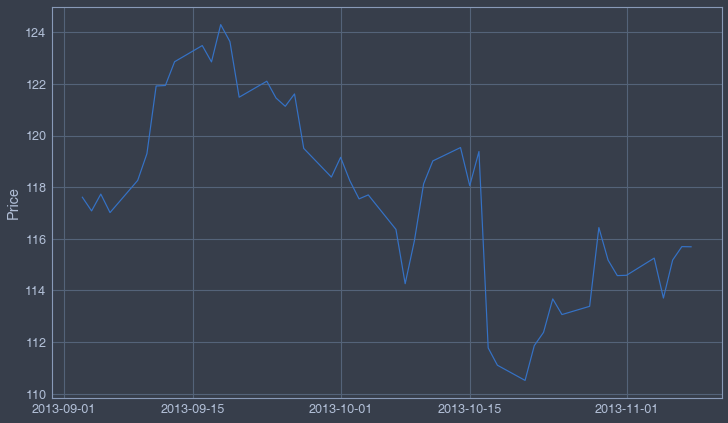

In [6]:
plt.plot(ibm_df['Close'].index, ibm_df['Close'].values)
plt.ylabel('Price');

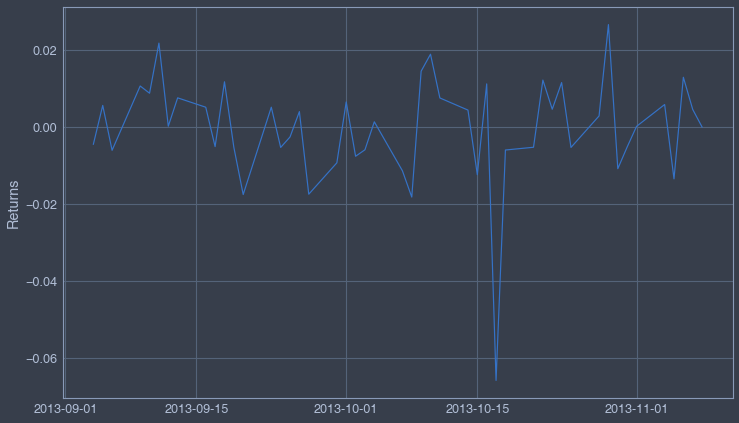

In [7]:
plt.plot(returns_sample.index, returns_sample.values)
plt.ylabel('Returns');

In [8]:
n = len(returns_sample)

test_statistic = ((returns_sample.mean() - 0) / (returns_sample.std()/np.sqrt(n)))
p_val = 2 *(1 - t.cdf(test_statistic, n - 1))

print(f't test statistic: {test_statistic}\np-value is: {p_val}')

t test statistic: -0.17061092833002253
p-value is: 1.134753160065455


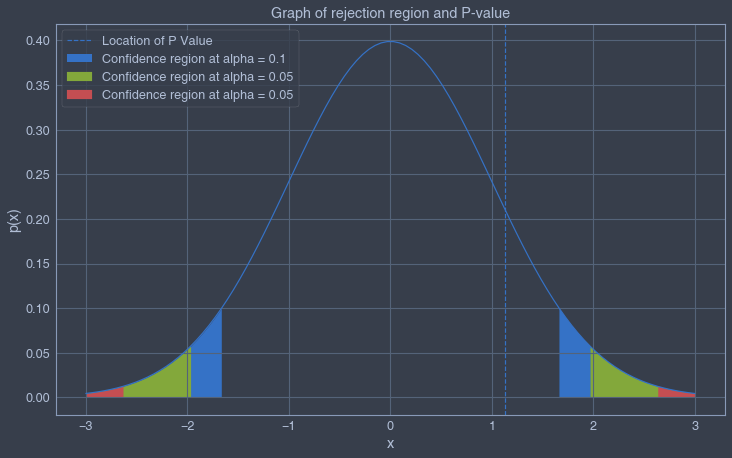

In [9]:
x = np.linspace(-3, 3, 100)
norm_pdf = lambda x: (1/np.sqrt(2 * np.pi)) * np.exp(-x * x / 2)
y = norm_pdf(x)

fig, ax = plt.subplots(1, 1, sharex=True)
ax.plot(x, y)

ax.fill_between(x, 0, y, where = x > 1.645, label = 'Confidence region at alpha = 0.1')
ax.fill_between(x, 0, y, where = x < -1.645, color = 'b')

ax.fill_between(x, 0, y, where = x > 1.96, label = 'Confidence region at alpha = 0.05', color = 'g')
ax.fill_between(x, 0, y, where = x < -1.96, color = 'g')

ax.fill_between(x, 0, y, where = x > 2.576, label = 'Confidence region at alpha = 0.05', color='r')
ax.fill_between(x, 0, y, where = x < -2.576, color = 'r')
plt.axvline(p_val, linestyle = 'dashed', label = 'Location of P Value')

plt.title('Graph of rejection region and P-value')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.legend();

### Hypothesis Testing on Means

In [10]:
bac_df = pd.read_csv('../data/BAC_2002-01-01_2022-12-31_1d.csv', index_col=0, parse_dates=True)
bac_returns = np.log(bac_df['Close'].div(bac_df['Close'].shift(1))).dropna()

bk_df = pd.read_csv('../data/BK_2002-01-01_2022-12-31_1d.csv', index_col=0, parse_dates=True)
bk_returns = np.log(bk_df['Close'].div(bk_df['Close'].shift(1))).dropna()

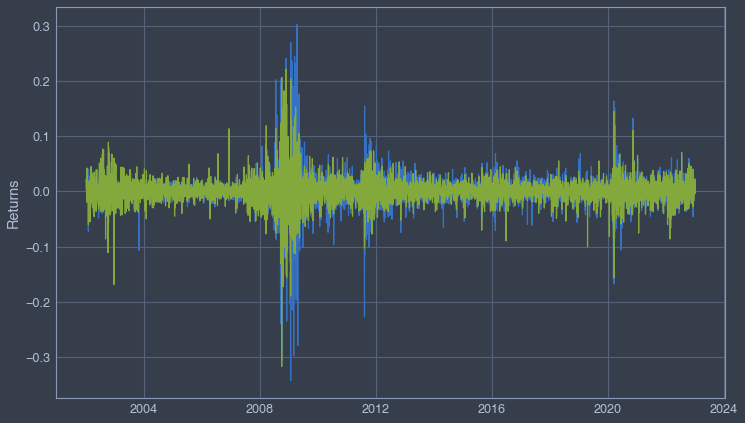

In [11]:
plt.plot(bac_returns.index, bac_returns.values)
plt.plot(bk_returns.index, bk_returns.values)
plt.ylabel('Returns');

In [12]:
# Sample mean values
mu_bac, mu_bk = bac_returns.mean(), bk_returns.mean()
s_bac, s_bk = bac_returns.std(), bk_returns.std()
n_bac = len(bac_returns)
n_bk = len(bk_returns)

test_statistic = ((mu_bac - mu_bk) - 0)/((s_bac**2/n_bac) + (s_bk**2/n_bk))**0.5
df = ((s_bac**2/n_bac) + (s_bk**2/n_bk))**2/(((s_bac**2 / n_bac)**2 /n_bac)+((s_bk**2 / n_bk)**2/n_bk))

print(f't test statistic: {test_statistic}')
print(f'Degrees of freedom (modified): {df}')

print('\n----------------------------------------------------------------\n')

if -1.960 < test_statistic < 1.960:
    print('Failed to reject H0. Difference between mean of BAC and mean BK not significantly different from zero.')
else:
    print('Reject H0. Difference between mean of BAC and mean BK significantly different from zero.')

t test statistic: 0.00903590245658047
Degrees of freedom (modified): 10082.927928595092

----------------------------------------------------------------

Failed to reject H0. Difference between mean of BAC and mean BK not significantly different from zero.


## Comparing Two Variances

In [3]:
bac_df = pd.read_csv('../data/BAC_2002-01-01_2022-12-31_1d.csv', index_col=0, parse_dates=True)
bac_returns = np.log(bac_df['Close'].div(bac_df['Close'].shift(1))).dropna()

bk_df = pd.read_csv('../data/BK_2002-01-01_2022-12-31_1d.csv', index_col=0, parse_dates=True)
bk_returns = np.log(bk_df['Close'].div(bk_df['Close'].shift(1))).dropna()

In [5]:
bac_std = bac_returns.std()
bk_std = bk_returns.std()

bac_std, bk_std

(0.02855928082213299, 0.022819203398459973)

In [9]:
test_statistic = (bac_std / bk_std)**2
df1 = len(bac_returns) - 1
df2 = len(bk_returns) - 1
upper_crit_value = f.ppf(0.975, df1, df2)
lower_crit_value = f.ppf(0.025, df1, df2)

print(f'F Test statistic: {test_statistic}')
print (f'Degrees of freedom for SPY: {df2}')
print (f'Degrees of freedom for AAPL: {df1}')
print (f'Upper critical value at a = 0.05 with df1 = {df1} and df2 = {df2}: {upper_crit_value}')
print (f'Lower critical value at a = 0.05 with df1 = {df1} and df2 = {df2}: {lower_crit_value}')

print('---------------------------')
if test_statistic > upper_crit_value or test_statistic < lower_crit_value:
    print('H0 ---> REJECT')
else:
    print('H0 ---> FAIL to reject')

F Test statistic: 1.5663671801214152
Degrees of freedom for SPY: 5286
Degrees of freedom for AAPL: 5286
Upper critical value at a = 0.05 with df1 = 5286 and df2 = 5286: 1.055401669153729
Lower critical value at a = 0.05 with df1 = 5286 and df2 = 5286: 0.9475065553021603
---------------------------
H0 ---> REJECT


<hr>

## Class

In [7]:
class DwdStocks:
    def __init__(self, tickers_list, start, end, mock=False):  
        self.test_tickers_list = ['AAPL', 'IBM', 'MCD']
        if mock:
            if tickers_list or len(tickers_list) <= 3:
                self.tickers_list = self.test_tickers_list[:len(tickers_list)]
            else:
                self.tickers_list = self.test_tickers_list
            self.get_mock_data()
        else:
            self.tickers_list = tickers_list
            self.start   = start
            self.end     = end
            self.get_quotes()

    def get_quotes(self):
        self.data = yf.download(
            self.tickers_list,
            start=self.start,
            end=self.end,
            
            auto_adjust=True,
            progress=False,
            show_errors=True
        )
    
    def get_mock_data(self):
        print('You are using TEST MODE.')
        if len(self.tickers_list) == 1:
            csv = '../data/AAPL_2021-01-01_2022-12-31_1d.csv'
            self.data = pd.read_csv(csv, index_col=0, parse_dates=True)
        elif len(self.tickers_list) == 2:
            csv = ('../data/AAPL_IBM_2021-01-01_2022-12-31_1d.csv')
            self.data = pd.read_csv(csv, index_col=0, header=[0,1], parse_dates=True)
        elif len(self.tickers_list) == 3:
            csv = '../data/AAPL_IBM_MCD_2021-01-01_2022-12-31_1d.csv'
            self.data = pd.read_csv(csv, index_col=0, header=[0,1], parse_dates=True)
        else:
            print('The maximum length of the ticker list for testing is 3.')
    
        print(f'tickers: {self.tickers_list} | date: from 2021-01-01 to 2022-12-31 | interval: 1day')
        
    def show_data(self, limit=5):
        return self.data.head(limit)


In [28]:
# word == 0, word <= 0, word >= 0
class h0_ha(DwdStocks):
    
    def __init__(self, tickers_list, start, end, mock=False):
        super().__init__(tickers_list, start, end, mock)
        
        self.returns_sample      = pd.DataFrame()
        self.returns_sample_info = pd.DataFrame()
        self.gather_info()
        self.plot = False
        
        self.PARAMS = {
            'mean'    : self.mean,
            'variance': self.variance
        }
        
        self.HYPOTHESES = [
            'equal',
            'not equal',
            'greater than or equal',
            'less than or equal'
        ]

    def gather_info(self):
        if len(self.tickers_list) == 1:
            self.returns_sample = np.log(
                self.data['Close'].div(
                    self.data['Close'].shift(1)
                )
            ).dropna()
            self.returns_sample_info = pd.DataFrame({
                'ticker': self.tickers_list,
                'mean'  : [self.returns_sample.mean()],
                'std'   : [self.returns_sample.std()],
                'len'   : [len(self.returns_sample)]
            })
        else:
            for i in self.tickers_list:
                self.returns_sample[i] = np.log(
                    self.data['Close'][i].div(
                        self.data['Close'][i].shift(1)
                    )
                ).dropna()
            self.returns_sample_info = pd.DataFrame({
                'ticker': self.tickers_list,
                'mean'  : list(self.returns_sample.mean()),
                'std'   : list(self.returns_sample.std()),
                'len'   : list([len(self.returns_sample)]*len(self.tickers_list))
            })
        
    # HYPOTHESES ----------------------------------------- #
    def get_pvalue(self, hypothesis, number, mean, std, length):
        test_statistic = ((mean - number) / (std/np.sqrt(length)))
        
        if hypothesis == 'equal' or hypothesis == 'less than or equal':
            p_val = 1 - t.cdf(test_statistic, length - 1)
        elif hypothesis == 'equal' or hypothesis == 'greater than or equal':
            p_val = t.cdf(test_statistic, length - 1)
        elif hypothesis == 'not equal':
            p_val = 2 * (1 - t.cdf(test_statistic, length - 1))
        
        return test_statistic, p_val
    
    # PARAMETERS ----------------------------------------- #
    def mean(self, number=None, hypothesis='equal', alpha=[90, 95, 99]):
        if number != None:
            for i in self.tickers_list:
                length = self.returns_sample_info[self.returns_sample_info['ticker']==i]['len'].values[0]
                mean   = self.returns_sample_info[self.returns_sample_info['ticker']==i]['mean'].values[0]
                std    = self.returns_sample_info[self.returns_sample_info['ticker']==i]['std'].values[0]
                
                test_statistic, p_val = self.get_pvalue(hypothesis, number, mean, std, length)
                
                self.show_test_result('mean', i, hypothesis, number, test_statistic, p_val)
        else:
            pass
    
    def variance(self, number=None, hypothesis='equal', alpha=[90, 95, 99]):
        pass
    
    # --- ----------------------------------------------- #
    def show_test_result(self, parameter, ticker, hypothesis, number, test_statistic, p_val):
        print('TEST')
        print(f'Ticker: {ticker}')
        print(f'H0: {parameter} {hypothesis} {number}')
        print(f'Test Statistics: {test_statistic}')
        print(f'P-value: {p_val}')
        print('===========================================')
    
    # TEST ----------------------------------------------- #
    def test(self, conditions=[
        {
            'parameter' : 'mean',
            'number'    : None,
            'hypothesis': 'equal',
            'alpha'     : [90, 95, 99]
        }
    ]):
        if conditions:
            for c in conditions:
                if c['parameter'] in self.PARAMS.keys() and c['hypothesis'] in self.HYPOTHESES:
                    self.PARAMS[c['parameter']](number=c['number'], hypothesis=c['hypothesis'], alpha=c['alpha'])
                else:
                    print('Conditions are wrong.')
                    print(f'Valid parameters: {*self.PARAMS.keys(),}')
                    print(f'Valid parameters: {*self.HYPOTHESES,}')

    def help_me(self):
        print(f'Valid parameters: {*self.PARAMS.keys(),}')
        print(f'Valid hypotheses: {*self.HYPOTHESES,}')

    def visualize(self):
        pass
    
    def show_result(self):        
        if self.plot:
            self.visualize()
        
        return self.returns_sample_info
            
            

In [24]:
st = h0_ha(['t'], dt.datetime(2021, 1, 1), dt.datetime(2022, 1, 1), mock=True)

You are using TEST MODE.
tickers: ['AAPL'] | date: from 2021-01-01 to 2022-12-31 | interval: 1day


In [25]:
st.test(conditions=[
    {
        'parameter' : 'mean',
        'number'    : 0,
        'hypothesis': 'equal',
        'alpha'     : [90, 95, 99]
    },
    {
        'parameter' : 'mean',
        'number'    : 0,
        'hypothesis': 'not equal',
        'alpha'     : [90, 95, 99]
    },
    {
        'parameter' : 'mean',
        'number'    : 0,
        'hypothesis': 'greater than or equal',
        'alpha'     : [90, 95, 99]
    },
    {
        'parameter' : 'mean',
        'number'    : 0,
        'hypothesis': 'less than or equal',
        'alpha'     : [90, 95, 99]
    },
])

TEST
Ticker: AAPL
H0: mean equal 0
Test Statistics: 0.03665681372621714
P-value: 0.48538662201909455
TEST
Ticker: AAPL
H0: mean not equal 0
Test Statistics: 0.03665681372621714
P-value: 0.9707732440381891
TEST
Ticker: AAPL
H0: mean greater than or equal 0
Test Statistics: 0.03665681372621714
P-value: 0.5146133779809055
TEST
Ticker: AAPL
H0: mean less than or equal 0
Test Statistics: 0.03665681372621714
P-value: 0.48538662201909455


In [26]:
st.help_me()

Valid parameters: ('mean', 'variance')
Valid hypotheses: ('equal', 'not equal', 'greater than or equal', 'less than or equal')


In [ ]:
h0_l = [
    'mean == ',
    'mean != ',
    'mean <= ',
    'mean >= ',

    'variance == ',
    'variance != ',
    'variance <= ',
    'variance >= ',

    'mean() == mean()',
    'mean() != mean()',
    'mean() <= mean()',
    'mean() >= mean()',

    'variance() == variance()',
    'variance() != variance()',
    'variance() <= variance()',
    'variance() >= variance()',
]